## Assignment for Week 1 - Introduction to Machine Learning


## Introduction

    In week 1, the assignment is to prepare data for machine learning. We are going to explore the data and understand the characteristics of the data to do cleaning, dealing with missing values, and dealing with outliers. Dataset we have is heart disease data which is a set of records of people with there diagnosis of heart disease. The data contains 15 variables where 'num' is the target and the other 14 are our features. those features are various from chest pain to number of years of smoking. 
    

## Method and result 

    First we import required libraries to handle dataset and visualize it. Then we import the data as a dataframe.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading data
df = pd.read_csv('heart.disease.data')


    Below, we can see that all variables are numeric and do not have missing values. However, the missing values are filled in the dataset by -9 which can not be shown by isNA or Info function. Instead, we are going to replace all -9 in the data and setting them as NA because it will make it easy to detect and handling them by Numpy and Pandas. Also, dm variable mean, minimum, 1st quartile, and 3rd quartile are -9 which indicates most of dm values are missing.  

In [3]:
# view data
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       282 non-null    int64
 1   sex       282 non-null    int64
 2   cp        282 non-null    int64
 3   trestbps  282 non-null    int64
 4   chol      282 non-null    int64
 5   cigs      282 non-null    int64
 6   years     282 non-null    int64
 7   fbs       282 non-null    int64
 8   dm        282 non-null    int64
 9   famhist   282 non-null    int64
 10  restecg   282 non-null    int64
 11  thalach   282 non-null    int64
 12  exang     282 non-null    int64
 13  thal      282 non-null    int64
 14  num       282 non-null    int64
dtypes: int64(15)
memory usage: 33.2 KB


,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,16.460993,14.829787,0.148936,-8.184397,0.620567,1.014184,149.765957,0.326241,4.581560,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,19.580300,15.564563,0.356658,2.741802,0.486108,0.998118,22.923869,0.469670,2.248467,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,-9.000000,-9.000000,0.000000,-9.000000,0.000000,0.000000,71.000000,0.000000,-9.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,133.250000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,10.000000,15.000000,0.000000,-9.000000,1.000000,2.000000,153.500000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,30.000000,30.000000,0.000000,-9.000000,1.000000,2.000000,165.750000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,99.000000,54.000000,1.000000,1.000000,1.000000,2.000000,202.000000,1.000000,7.000000,4.000000


In [4]:
df.head()
df.tail()

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
277,39,0,3,138,220,20,23,0,-9,0,0,152,0,3,0
278,57,1,2,154,232,40,35,0,-9,1,2,164,0,3,1
279,58,0,4,130,197,0,0,0,-9,1,0,131,0,3,0
280,57,1,4,110,335,20,15,0,-9,1,0,143,1,7,2
281,47,1,3,130,253,0,0,0,-9,1,0,179,0,3,0



       Below, we replace all -9 values with NA and pring NA for all columns. As suspected, 259 out of 282 of dm column values are missing. Because of that, removing the whole column is the best choice. Also, cigs, years, and thal variables have some missing values.

In [5]:
## -9 value in dataset means Null, we replace -9 with NA to find missing values and deal with them

df.replace(-9,pd.NA,inplace=True)
df.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
cigs          5
years         5
fbs           0
dm          259
famhist       0
restecg       0
thalach       0
exang         0
thal          2
num           0
dtype: int64

In [6]:
# since 259 out of 282 of dm values are missing, I'm dropping the column 
df = df.drop('dm', axis=1)


    As for other variables that having missing values, we will look at their distribution to decide whether we fill the missing values with mean or median. 

<AxesSubplot:>

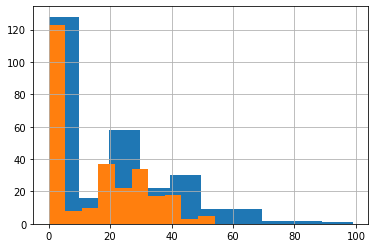

In [7]:
df['cigs'].hist()
df['years'].hist()

<AxesSubplot:>

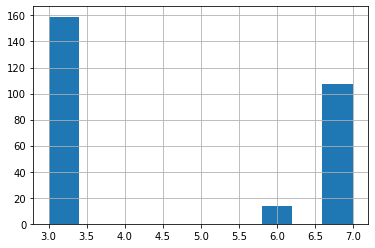

In [8]:
df['thal'].hist()


    All of the three variable do not have normal distribution. So, the best option is eather dropping the rows or fill them with median. I filled them with median. 

In [10]:
# since years and cigs data are skewed, I'm going to replace the missing values with median.
df['cigs'].fillna(df['cigs'].median(), inplace=True)
df['years'].fillna(df['years'].median(), inplace=True)
df['thal'].fillna(df['thal'].median(), inplace=True)


In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
cigs        0
years       0
fbs         0
famhist     0
restecg     0
thalach     0
exang       0
thal        0
num         0
dtype: int64

    After dealing with the missing values, we now going to deal with the outliers. One way to detect outliers is by boxplot. anything out of bound is considered as outlier. Boxplot below shows that trestbps, chol, and thalach have outliers. the decision of keeping or removing outliers is depending on many factors such as the amount of outliers and their effects on the result. Here I decided to removing those outliers because I believe that is necssary to remove them to have more accurate models.  

<AxesSubplot:>

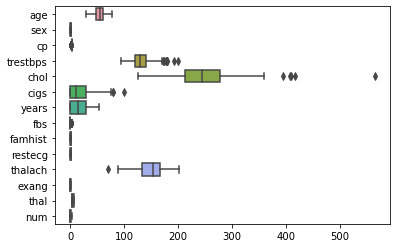

In [12]:
sns.boxplot(data=df, orient='h')

In [13]:
# removing outliers from df for chol
Q1c = df['chol'].quantile(0.25)
Q3c = df['chol'].quantile(0.75)
IQRc = Q3c - Q1c    #IQR is interquartile range. 
lowqe_boundc = Q1c - 1.5 * IQRc
upper_boundc = Q3c + 1.5 * IQRc

df_cln = df[~((df['chol'] < lowqe_boundc) |(df['chol'] > upper_boundc))]
df_cln.shape  

(277, 14)

<AxesSubplot:>

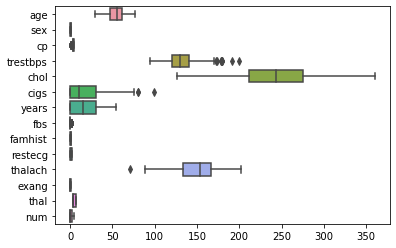

In [14]:

sns.boxplot(data=df_cln, orient='h')

In [15]:
# removing outliers from df for trestbps
Q1t = df_cln['trestbps'].quantile(0.25)
Q3t = df_cln['trestbps'].quantile(0.75)
IQRt = Q3t - Q1t    #IQR is interquartile range. 
lowqe_boundt = Q1t - 1.5 * IQRt
upper_boundt = Q3t + 1.5 * IQRt

df_cln1 = df_cln[~((df_cln['trestbps'] < lowqe_boundt) |(df_cln['trestbps'] > upper_boundt))]
df_cln1.shape  

(268, 14)

<AxesSubplot:>

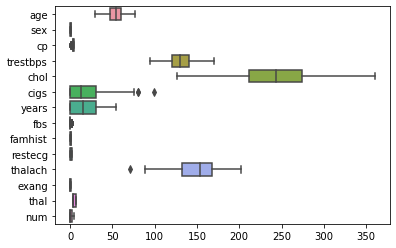

In [16]:

sns.boxplot(data=df_cln1, orient='h')

In [17]:
# removing outliers from df for cigs
Q1cigs = df_cln1['cigs'].quantile(0.25)
Q3cigs = df_cln1['cigs'].quantile(0.75)
IQRcigs = Q3cigs - Q1cigs    #IQR is interquartile range. 
lowqe_boundcigs = Q1cigs - 1.5 * IQRcigs
upper_boundcigs = Q3cigs + 1.5 * IQRcigs

df_cln2 = df_cln1[~((df_cln1['cigs'] < lowqe_boundcigs) |(df_cln1['cigs'] > upper_boundcigs))]
df_cln2.shape  

(265, 14)

<AxesSubplot:>

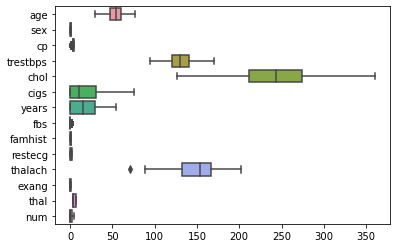

In [18]:

sns.boxplot(data=df_cln2, orient='h')

In [19]:
# removing outliers from df for thalach
Q1ta = df_cln2['thalach'].quantile(0.25)
Q3ta = df_cln2['thalach'].quantile(0.75)
IQRta = Q3ta - Q1ta    #IQR is interquartile range. 
lowqe_boundta = Q1ta - 1.5 * IQRta
upper_boundta = Q3ta + 1.5 * IQRta

df_cln3 = df_cln2[~((df_cln2['thalach'] < lowqe_boundta) |(df_cln2['thalach'] > upper_boundta))]
df_cln3.shape  

(264, 14)

<AxesSubplot:>

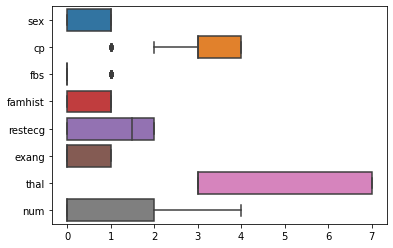

In [20]:
#cp , fbs

sns.boxplot(data=df_cln3[['sex','cp','fbs','famhist','restecg','exang', 'thal','num']], orient='h')


In [21]:
# removing outliers from df for thalach
Q1cp = df_cln3['cp'].quantile(0.25)
Q3cp = df_cln3['cp'].quantile(0.75)
IQRcp = Q3cp - Q1cp    #IQR is interquartile range. 
lowqe_boundcp = Q1cp - 1.5 * IQRcp
upper_boundcp = Q3cp + 1.5 * IQRcp

df_cln4 = df_cln3[~((df_cln3['cp'] < lowqe_boundcp) |(df_cln3['cp'] > upper_boundcp))]
df_cln4.shape  

(243, 14)

<AxesSubplot:>

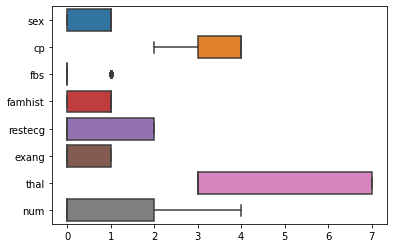

In [22]:
sns.boxplot(data=df_cln4[['sex','cp','fbs','famhist','restecg','exang', 'thal','num']], orient='h')

In [23]:
# removing outliers from df for thalach
Q1f = df_cln4['fbs'].quantile(0.25)
Q3f = df_cln4['fbs'].quantile(0.75)
IQRf = Q3f - Q1f    #IQR is interquartile range. 
lowqe_boundf = Q1f - 1.5 * IQRf
upper_boundf = Q3f + 1.5 * IQRf

df_cln5 = df_cln4[~((df_cln4['fbs'] < lowqe_boundf) |(df_cln4['fbs'] > upper_boundf))]
df_cln5.shape  

(212, 14)

    Below is boxplot of the dataset after being cleaned and ready for modeling. 

<AxesSubplot:>

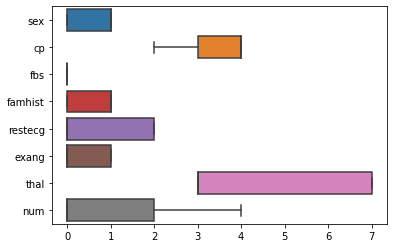

In [24]:
sns.boxplot(data=df_cln5[['sex','cp','fbs','famhist','restecg','exang', 'thal','num']], orient='h')

<AxesSubplot:>

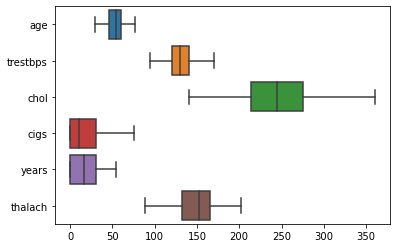

In [25]:
sns.boxplot(data=df_cln5[['age','trestbps','chol','cigs','years','thalach',]], orient='h')

## summary

    Although data is clean now, I am concerned that almost 30% of the data are removed because they're outliers. Also, the data can be improved by combining some variables. Finally, I faced problems not knowing how to find missing values because they are labeled by -9 and I did not had the enough experience to convert them to NAs. Also, it took me so much time to complete the code because I wanted to learn the code and what every function does rather than just copying them. 



## References 

    Detect and Remove Outliers from Pandas DataFrame. (2021, August 29). Retrieved from knowledge transfer: https://androidkt.com/detect-and-remove-outliers-from-pandas-dataframe/
    How to set a cell to NaN in a pandas dataframe. (n.d.). Retrieved from stack overflow: https://stackoverflow.com/questions/34794067/how-to-set-a-cell-to-nan-in-a-pandas-dataframe

